# Movie Analysis Project by Brooke Smyth, Garrett Williams, and Scott Schumann

**Overview:** [LET'S FILL IN A ONE PARAGRAPH OVERVIEW OF THE PROJECT LATER]

**Business Problem:** [SUMMARY OF BUSINESS PROBLEM TO BE FILLED IN LATER]

**Data Understanding:** [DESCRIPTION OF DATA BEING USED IN THIS PROJECT TO BE FILLED IN LATER]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Data Preparation:** [DESCRIBE AND JUSTIFY THE PROCESS OF PREPARING DATA FOR ANALYSIS TO BE FILLED IN LATER]

In [2]:
imdb_name = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
imdb_title = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
imdb_crew = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
imdb_principals = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
imdb_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
rt_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter="\t")
rt_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep="\t", encoding='latin-1')
tn = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [3]:
# Merging dataframes
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [4]:
#create a new column that has the year as an integer
tn['year_int'] = tn['release_date'].str[-4:].astype(int)

#get info from movies since 2010 because that's as far back as the imdb data goes
tn = tn[tn['year_int'] >= 2015]

#convert the values in the worldwide gross column to integers
tn["ww_gross_int"] = tn["worldwide_gross"].replace("[\$,]", "", regex=True).astype(int)

#convert the values in the production budget column to integers
tn["pro_budget_int"] = tn["production_budget"].replace("[\$,]", "", regex=True).astype(int)

#create a new column that calculates return on investment 
tn["roi"] = (tn["ww_gross_int"] - tn["pro_budget_int"])/tn["pro_budget_int"]

#sort the movies by return on investment
tn.sort_values(by = "roi", ascending = False, inplace = True)
tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_int,ww_gross_int,pro_budget_int,roi
5679,80,"Jul 10, 2015",The Gallows,"$100,000","$22,764,410","$41,656,474",2015,41656474,100000,415.564740
5213,14,"Apr 17, 2015",Unfriended,"$1,000,000","$32,789,645","$64,364,198",2015,64364198,1000000,63.364198
4249,50,"Jan 20, 2017",Split,"$5,000,000","$138,141,585","$278,964,806",2017,278964806,5000000,54.792961
4248,49,"Feb 24, 2017",Get Out,"$5,000,000","$176,040,665","$255,367,951",2017,255367951,5000000,50.073590
5063,64,"Oct 21, 2016",Moonlight,"$1,500,000","$27,854,931","$65,245,512",2016,65245512,1500000,42.497008
...,...,...,...,...,...,...,...,...,...,...
4995,96,"Mar 20, 2015",The Walking Deceased,"$2,000,000",$0,$0,2015,0,2000000,-1.000000
4997,98,"Aug 21, 2015",The Curse of Downers Grove,"$2,000,000",$0,$0,2015,0,2000000,-1.000000
4998,99,"Dec 31, 2015",Wind Walkers,"$2,000,000",$0,$0,2015,0,2000000,-1.000000
4999,100,"Jul 8, 2016",The Dog Lover,"$2,000,000",$0,$0,2016,0,2000000,-1.000000


In [5]:
imdb_title_rb = pd.merge(imdb_title, imdb_ratings, on = "tconst", how = "left")

In [6]:
imdb_title_crb = pd.merge(imdb_title_rb, imdb_crew, on = "tconst", how = "left")
imdb_title_crb.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,writers
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0,nm0002411,NaN
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0,nm0000080,"nm0000080,nm0462648"
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0,nm0611531,nm0347899
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0,"nm0765384,nm0749914","nm1360635,nm0749914"


In [7]:
#imdb_merged = pd.merge(imdb_title_crb, imdb_name, left_on = "directors", right_on = "nconst", how = "left")
#imdb_merged.head()

In [8]:
#Merging the TN and IMDB dataframes, which only includes data from 2010 to the present. We feel this is 
#relevant because the stakeholder is trying to start a new studio and thus more recent data is probably
#more useful.
tn_imdb_merged = pd.merge(tn, imdb_title_crb, left_on = ['movie', 'year_int'], right_on = ['primary_title', 'start_year'], how = 'inner')
tn_imdb_merged

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_int,ww_gross_int,pro_budget_int,roi,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,writers
0,80,"Jul 10, 2015",The Gallows,"$100,000","$22,764,410","$41,656,474",2015,41656474,100000,415.564740,tt2309260,The Gallows,The Gallows,2015,81.0,"Horror,Mystery,Thriller",4.2,17763.0,"nm4000389,nm3951039","nm3951039,nm4000389"
1,49,"Feb 24, 2017",Get Out,"$5,000,000","$176,040,665","$255,367,951",2017,255367951,5000000,50.073590,tt5052448,Get Out,Get Out,2017,104.0,"Horror,Mystery,Thriller",7.7,400474.0,nm1443502,nm1443502
2,64,"Oct 21, 2016",Moonlight,"$1,500,000","$27,854,931","$65,245,512",2016,65245512,1500000,42.497008,tt4975722,Moonlight,Moonlight,2016,111.0,Drama,7.4,227964.0,nm1503575,"nm1503575,nm4144120"
3,56,"Dec 21, 2016",Dangal,"$9,500,000","$12,391,761","$294,654,618",2016,294654618,9500000,30.016276,tt5074352,Dangal,Dangal,2016,161.0,"Action,Biography,Drama",8.5,123638.0,nm4318159,"nm6328029,nm6328031,nm6328030,nm8661566,nm4318159"
4,55,"Jul 22, 2016",Lights Out,"$5,000,000","$67,268,835","$148,806,510",2016,148806510,5000000,28.761302,tt4786282,Lights Out,Lights Out,2016,81.0,"Drama,Horror,Mystery",6.3,100650.0,nm2497546,"nm2104063,nm2497546"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,85,"Oct 6, 2015",The Timber,"$2,100,000",$0,$0,2015,0,2100000,-1.000000,tt2215673,The Timber,The Timber,2015,81.0,"Action,Adventure,Drama",4.9,1292.0,nm2557193,"nm2551258,nm2557193,nm4882017"
649,96,"Mar 20, 2015",The Walking Deceased,"$2,000,000",$0,$0,2015,0,2000000,-1.000000,tt3499458,The Walking Deceased,Walking with the Dead,2015,88.0,"Comedy,Horror",3.5,2914.0,nm3438843,nm4333498
650,98,"Aug 21, 2015",The Curse of Downers Grove,"$2,000,000",$0,$0,2015,0,2000000,-1.000000,tt1772261,The Curse of Downers Grove,The Curse of Downers Grove,2015,89.0,"Drama,Horror,Mystery",4.5,1618.0,nm0553796,"nm0254735,nm0394975,nm0553796"
651,99,"Dec 31, 2015",Wind Walkers,"$2,000,000",$0,$0,2015,0,2000000,-1.000000,tt1236254,Wind Walkers,Wind Walkers,2015,93.0,"Action,Horror,Thriller",3.8,234.0,nm0295031,nm0295031


**Data Modeling:**

# Visualizing Genre Trends

We analyzed genre trends from a variety of angles but we concluded that genre categories by themselves do not correlate as strongly with ROI as the directors, actors/actresses, and writers. 

Great quote here from Roberto Donati "Obviously, as we can perceive by intuition, genre classification is a human convention to simplify and clarify the artistic production and the subsequent study of it. And so far as all conventions are created by human beings, it has its good qualities but its limits as well; for example since genre is often a guide to help an audience make a right choice, it can tend to over-simplify the substance of a film. For example, what is Wes Anderson’s The Royal Tenenbaums? A comedy? Yes, indeed, the structure, characters and the director’s vision are those of a comedy, but the film is not only cheerful, weird and funny, it is also tragic, intelligently poignant, melancholic, adventurous, dramatic, moving and something else. In this sense it is comforting for a possible viewer to know that one film is, after all, a comedy; but, on the contrary, if this viewer desires and expects a comedy, will he/she be satisfied with The Royal Tenenbaums, a most unconventional and atypical comedy? So one can say that genres exist in the cinema, and they can be useful for commercial purposes, but an intelligent cinéphile (and a standard spectator as well) should not be too influenced in their choice and in their judgement about a film’s genre properties." 

Donati, Roberto. "Do Genres in the Cinema Really Exist and if so, Can They be Defined?" *Off Screen* 14, No. 1 (January 2010). https://offscreen.com/view/do_genres_exist.

In [9]:
# Doing explode method with genre to isolate each genre
tn_imdb_merged_genre = tn_imdb_merged
tn_imdb_merged_genre = tn_imdb_merged_genre.assign(genres=tn_imdb_merged_genre['genres'].str.split(",")).explode('genres')
tn_imdb_merged_genre

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_int,ww_gross_int,pro_budget_int,roi,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,writers
0,80,"Jul 10, 2015",The Gallows,"$100,000","$22,764,410","$41,656,474",2015,41656474,100000,415.56474,tt2309260,The Gallows,The Gallows,2015,81.0,Horror,4.2,17763.0,"nm4000389,nm3951039","nm3951039,nm4000389"
0,80,"Jul 10, 2015",The Gallows,"$100,000","$22,764,410","$41,656,474",2015,41656474,100000,415.56474,tt2309260,The Gallows,The Gallows,2015,81.0,Mystery,4.2,17763.0,"nm4000389,nm3951039","nm3951039,nm4000389"
0,80,"Jul 10, 2015",The Gallows,"$100,000","$22,764,410","$41,656,474",2015,41656474,100000,415.56474,tt2309260,The Gallows,The Gallows,2015,81.0,Thriller,4.2,17763.0,"nm4000389,nm3951039","nm3951039,nm4000389"
1,49,"Feb 24, 2017",Get Out,"$5,000,000","$176,040,665","$255,367,951",2017,255367951,5000000,50.07359,tt5052448,Get Out,Get Out,2017,104.0,Horror,7.7,400474.0,nm1443502,nm1443502
1,49,"Feb 24, 2017",Get Out,"$5,000,000","$176,040,665","$255,367,951",2017,255367951,5000000,50.07359,tt5052448,Get Out,Get Out,2017,104.0,Mystery,7.7,400474.0,nm1443502,nm1443502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,98,"Aug 21, 2015",The Curse of Downers Grove,"$2,000,000",$0,$0,2015,0,2000000,-1.00000,tt1772261,The Curse of Downers Grove,The Curse of Downers Grove,2015,89.0,Mystery,4.5,1618.0,nm0553796,"nm0254735,nm0394975,nm0553796"
651,99,"Dec 31, 2015",Wind Walkers,"$2,000,000",$0,$0,2015,0,2000000,-1.00000,tt1236254,Wind Walkers,Wind Walkers,2015,93.0,Action,3.8,234.0,nm0295031,nm0295031
651,99,"Dec 31, 2015",Wind Walkers,"$2,000,000",$0,$0,2015,0,2000000,-1.00000,tt1236254,Wind Walkers,Wind Walkers,2015,93.0,Horror,3.8,234.0,nm0295031,nm0295031
651,99,"Dec 31, 2015",Wind Walkers,"$2,000,000",$0,$0,2015,0,2000000,-1.00000,tt1236254,Wind Walkers,Wind Walkers,2015,93.0,Thriller,3.8,234.0,nm0295031,nm0295031


In [10]:
#genres = tn_imdb_merged_genre['genres'].value_counts()
#fig, ax = plt.subplots(figsize = (20, 10))

#k = genres.index
#v = genres.values

#ax.set_xlabel("Genres")
#ax.set_ylabel("Number of Mentions per Genre")
#ax.set_title('Number of Mentions of Each Movie Genre Sorted by ROI')
#ax.tick_params(axis='x', labelrotation = 20)

#ax.bar(x = list(k), height = list(v));

Visualizing genres in the full dataset:

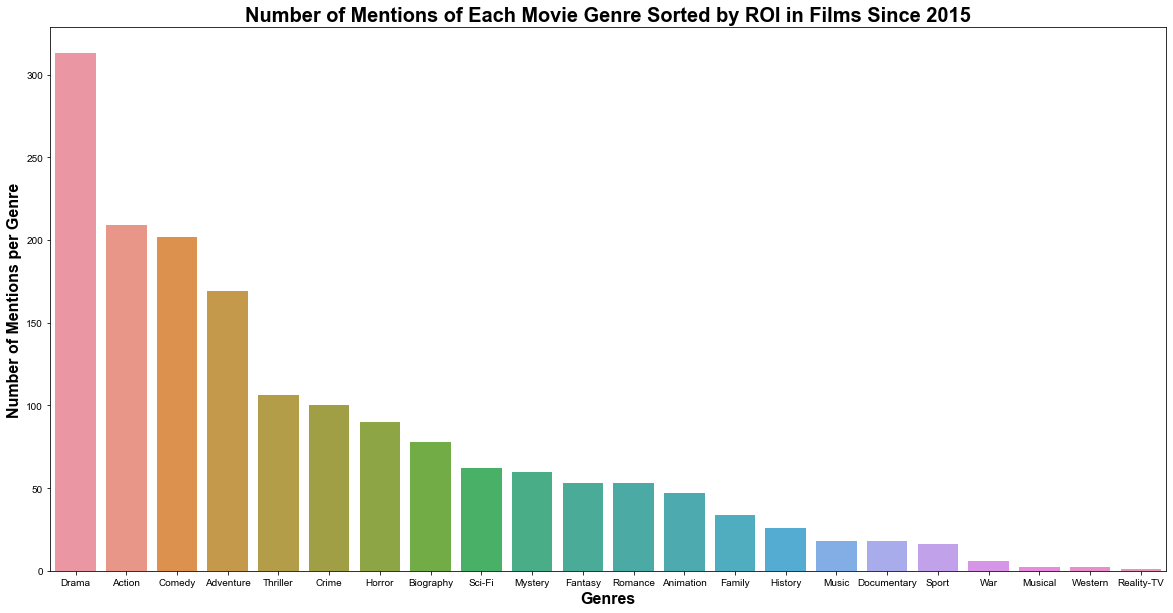

In [11]:
genres = tn_imdb_merged_genre['genres'].value_counts()
fig, ax = plt.subplots(figsize = (20, 10))
k = genres.index
v = genres.values
ax = sns.barplot(x = genres.index, y = genres.values)
sns.set_theme(style = 'darkgrid')
ax.grid(False)
ax.set_xlabel("Genres", size = 16, fontweight = 'bold')
ax.set_ylabel("Number of Mentions per Genre", size = 16, fontweight = 'bold')
ax.set_title("Number of Mentions of Each Movie Genre Sorted by ROI in Films Since 2015", size = 20, fontweight = 'bold')
ax.figure.savefig("movie_genres_all.png");

Visualizing genres in the top 10 films:

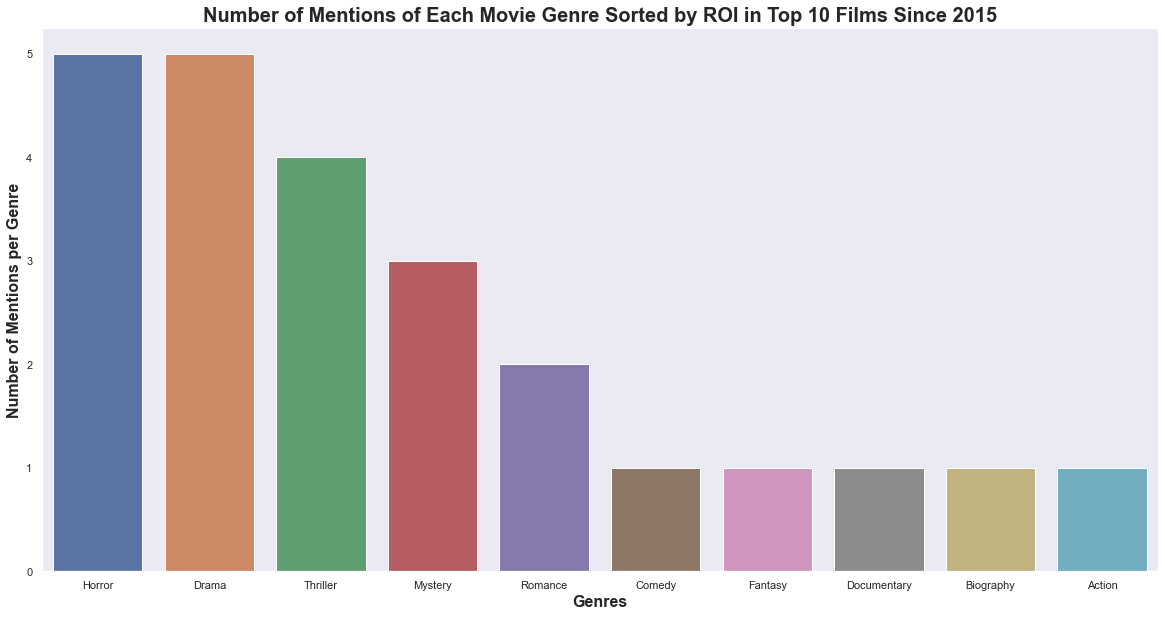

In [12]:
tn_imdb_merged_genre_top_10 = tn_imdb_merged_genre.head(24)
genres_top_10 = tn_imdb_merged_genre_top_10['genres'].value_counts()
fig, ax = plt.subplots(figsize = (20, 10))
ax = sns.barplot(x = genres_top_10.index, y = genres_top_10.values)
sns.set_theme(style = 'darkgrid')
ax.grid(False)
ax.set_xlabel("Genres", size = 16, fontweight = 'bold')
ax.set_ylabel("Number of Mentions per Genre", size = 16, fontweight = 'bold')
ax.set_title("Number of Mentions of Each Movie Genre Sorted by ROI in Top 10 Films Since 2015", size = 20, fontweight = 'bold')
ax.figure.savefig("movie_genres_top_10.png");

Visualizing genres in the top 100 films:

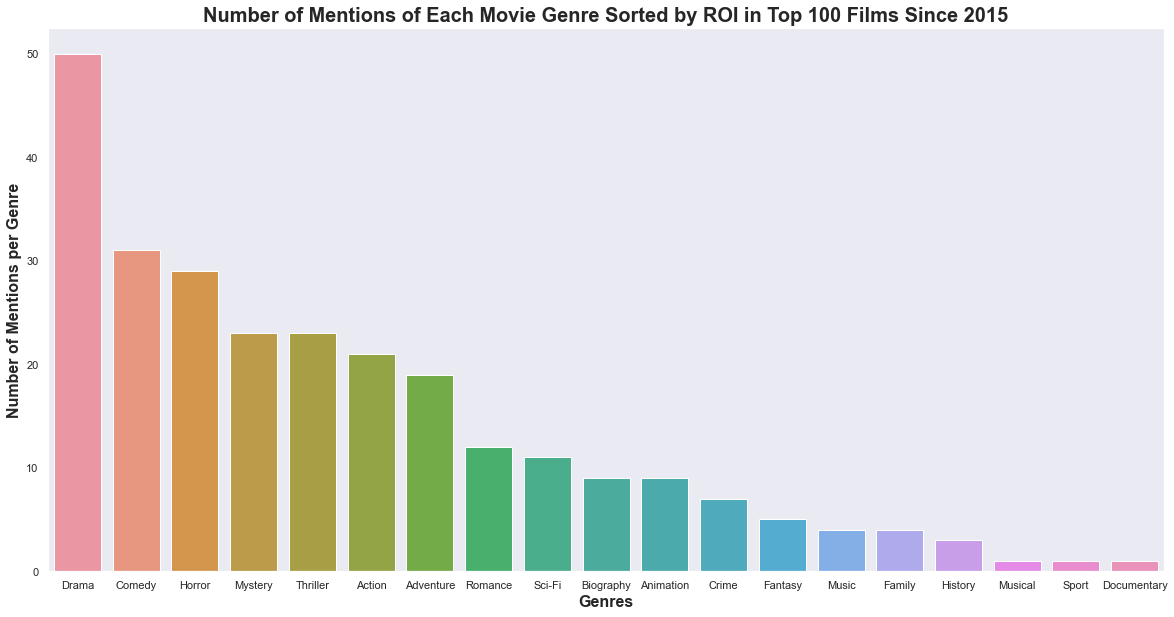

In [13]:
tn_imdb_merged_genre_top_100 = tn_imdb_merged_genre.head(264)
genres_top_100 = tn_imdb_merged_genre_top_100['genres'].value_counts()
fig, ax = plt.subplots(figsize = (20, 10))
ax = sns.barplot(x = genres_top_100.index, y = genres_top_100.values)
sns.set_theme(style = 'darkgrid')
ax.grid(False)
ax.set_xlabel("Genres", size = 16, fontweight = 'bold')
ax.set_ylabel("Number of Mentions per Genre", size = 16, fontweight = 'bold')
ax.set_title("Number of Mentions of Each Movie Genre Sorted by ROI in Top 100 Films Since 2015", size = 20, fontweight = 'bold')
ax.figure.savefig("movie_genres_top_100.png");

Examining genre trends by year

In [14]:
#test = tn_imdb_merged_genre.copy()

In [15]:
#plt.figure(figsize = (20, 30))
#sns.countplot(y = test['year_int'], hue = 'genres', data = test, orient = 'h');

# Visualizing Top Writers by ROI

In [16]:
#first, merge the money dataframe with only the crew data frame
imdb_writers_roi = pd.merge(tn, imdb_title_crb, left_on = ['movie', 'year_int'], right_on = ['primary_title', 'start_year'], how = 'inner')
#only focus on a couple columns that I need
imdb_writers_roi = imdb_writers_roi[['movie', 'roi', 'writers', 'year_int']]
#explode the writers column so that multiple writer can be assigned to the same movie
imdb_writers_roi = imdb_writers_roi.assign(writers=imdb_writers_roi['writers'].str.split(",")).explode('writers')
imdb_writers_roi

,movie,roi,writers,year_int
0,The Gallows,415.564740,nm3951039,2015
0,The Gallows,415.564740,nm4000389,2015
1,Get Out,50.073590,nm1443502,2017
2,Moonlight,42.497008,nm1503575,2016
2,Moonlight,42.497008,nm4144120,2016
...,...,...,...,...
650,The Curse of Downers Grove,-1.000000,nm0254735,2015
650,The Curse of Downers Grove,-1.000000,nm0394975,2015
650,The Curse of Downers Grove,-1.000000,nm0553796,2015
651,Wind Walkers,-1.000000,nm0295031,2015


In [17]:
#now merge the name dataframe with the writers
imdb_writers_name_roi = pd.merge(imdb_writers_roi, imdb_name, left_on = 'writers', right_on = 'nconst', how = 'left')
#again only take the necessary columns
imdb_writers_name_roi= imdb_writers_name_roi[['movie', 'roi', 'writers', 'nconst', 'primary_name', 'year_int', 'death_year']]
imdb_writers_name_roi

,movie,roi,writers,nconst,primary_name,year_int,death_year
0,The Gallows,415.564740,nm3951039,nm3951039,Chris Lofing,2015,NaN
1,The Gallows,415.564740,nm4000389,nm4000389,Travis Cluff,2015,NaN
2,Get Out,50.073590,nm1443502,nm1443502,Jordan Peele,2017,NaN
3,Moonlight,42.497008,nm1503575,nm1503575,Barry Jenkins,2016,NaN
4,Moonlight,42.497008,nm4144120,nm4144120,Tarell Alvin McCraney,2016,NaN
...,...,...,...,...,...,...,...
1679,The Curse of Downers Grove,-1.000000,nm0254735,nm0254735,Bret Easton Ellis,2015,NaN
1680,The Curse of Downers Grove,-1.000000,nm0394975,nm0394975,Michael Hornburg,2015,NaN
1681,The Curse of Downers Grove,-1.000000,nm0553796,nm0553796,Derick Martini,2015,NaN
1682,Wind Walkers,-1.000000,nm0295031,nm0295031,Russell Friedenberg,2015,NaN


In [18]:
# Filtering df to include desired columns and remove people who are dead
imdb_writers_name_roi = imdb_writers_name_roi[imdb_writers_name_roi['death_year'].isna()]
imdb_writers_name_roi

,movie,roi,writers,nconst,primary_name,year_int,death_year
0,The Gallows,415.564740,nm3951039,nm3951039,Chris Lofing,2015,NaN
1,The Gallows,415.564740,nm4000389,nm4000389,Travis Cluff,2015,NaN
2,Get Out,50.073590,nm1443502,nm1443502,Jordan Peele,2017,NaN
3,Moonlight,42.497008,nm1503575,nm1503575,Barry Jenkins,2016,NaN
4,Moonlight,42.497008,nm4144120,nm4144120,Tarell Alvin McCraney,2016,NaN
...,...,...,...,...,...,...,...
1679,The Curse of Downers Grove,-1.000000,nm0254735,nm0254735,Bret Easton Ellis,2015,NaN
1680,The Curse of Downers Grove,-1.000000,nm0394975,nm0394975,Michael Hornburg,2015,NaN
1681,The Curse of Downers Grove,-1.000000,nm0553796,nm0553796,Derick Martini,2015,NaN
1682,Wind Walkers,-1.000000,nm0295031,nm0295031,Russell Friedenberg,2015,NaN


In [19]:
#changing ROI column to percentage value
imdb_writers_name_roi['roi'] = imdb_writers_name_roi['roi']*100
imdb_writers_name_roi

<ipython-input-19-f0726470c398>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_writers_name_roi['roi'] = imdb_writers_name_roi['roi']*100


,movie,roi,writers,nconst,primary_name,year_int,death_year
0,The Gallows,41556.47400,nm3951039,nm3951039,Chris Lofing,2015,NaN
1,The Gallows,41556.47400,nm4000389,nm4000389,Travis Cluff,2015,NaN
2,Get Out,5007.35902,nm1443502,nm1443502,Jordan Peele,2017,NaN
3,Moonlight,4249.70080,nm1503575,nm1503575,Barry Jenkins,2016,NaN
4,Moonlight,4249.70080,nm4144120,nm4144120,Tarell Alvin McCraney,2016,NaN
...,...,...,...,...,...,...,...
1679,The Curse of Downers Grove,-100.00000,nm0254735,nm0254735,Bret Easton Ellis,2015,NaN
1680,The Curse of Downers Grove,-100.00000,nm0394975,nm0394975,Michael Hornburg,2015,NaN
1681,The Curse of Downers Grove,-100.00000,nm0553796,nm0553796,Derick Martini,2015,NaN
1682,Wind Walkers,-100.00000,nm0295031,nm0295031,Russell Friedenberg,2015,NaN


In [20]:
#looking at ROI statistics for writers by name
df_writer_stats = imdb_writers_name_roi.groupby(by = ['primary_name'])['roi'].describe()
df_writer_stats.sort_values(by = '50%', ascending = False).head(10)

,count,mean,std,min,25%,50%,75%,max
primary_name,,,,,,,,
Travis Cluff,1.0,41556.474000,NaN,41556.474000,41556.474000,41556.474000,41556.474000,41556.474000
Chris Lofing,1.0,41556.474000,NaN,41556.474000,41556.474000,41556.474000,41556.474000,41556.474000
Tarell Alvin McCraney,1.0,4249.700800,NaN,4249.700800,4249.700800,4249.700800,4249.700800,4249.700800
Nitesh Tiwari,1.0,3001.627558,NaN,3001.627558,3001.627558,3001.627558,3001.627558,3001.627558
Shreyas Jain,1.0,3001.627558,NaN,3001.627558,3001.627558,3001.627558,3001.627558,3001.627558
Piyush Gupta,1.0,3001.627558,NaN,3001.627558,3001.627558,3001.627558,3001.627558,3001.627558
Nikhil Mehrotra,1.0,3001.627558,NaN,3001.627558,3001.627558,3001.627558,3001.627558,3001.627558
Rajshri Sudhakar,1.0,3001.627558,NaN,3001.627558,3001.627558,3001.627558,3001.627558,3001.627558
David F. Sandberg,1.0,2876.130200,NaN,2876.130200,2876.130200,2876.130200,2876.130200,2876.130200


Visualizing top 5 writers list sorted by mean ROI:

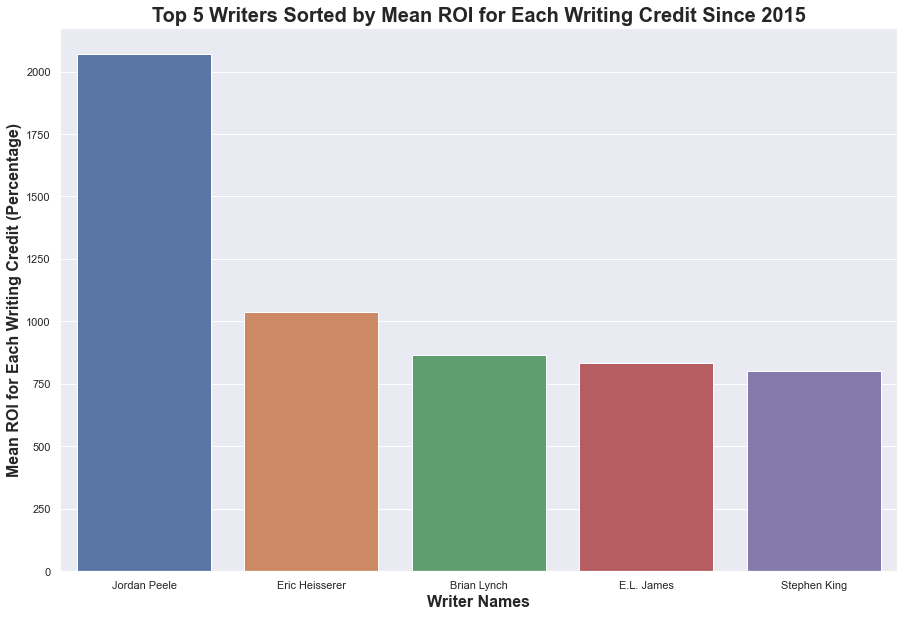

In [21]:
writer_list_mean = df_writer_stats[df_writer_stats['count'] > 2].sort_values(by = 'mean', ascending = False).head(5)
plt.figure(figsize = (15, 10))
sns.set_theme(style = 'darkgrid')
ax = sns.barplot(x = writer_list_mean.index, y = 'mean', data=writer_list_mean)
ax.set_xlabel("Writer Names", size = 16, fontweight = 'bold')
ax.set_ylabel("Mean ROI for Each Writing Credit (Percentage)", size = 16, fontweight = 'bold')
ax.set_title("Top 5 Writers Sorted by Mean ROI for Each Writing Credit Since 2015", size = 20, fontweight = 'bold')
ax.figure.savefig("writers_mean.png");

Visualizing top 5 writers list sorted by number of films made since 2015:

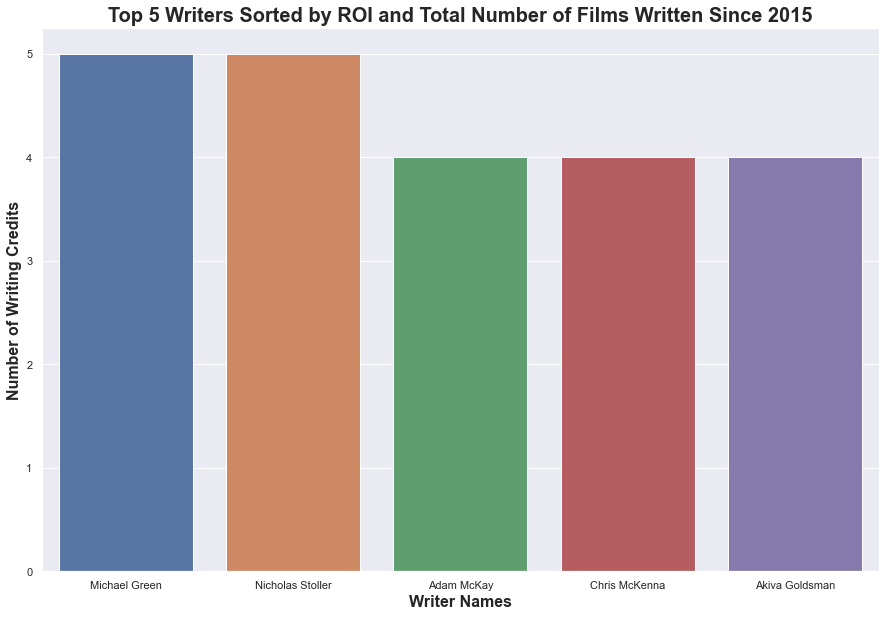

In [22]:
writer_list_count = df_writer_stats[df_writer_stats['count'] > 2].sort_values(by = 'count', ascending = False).head(5)
plt.figure(figsize = (15, 10))
ax = sns.barplot(x = writer_list_count.index, y = 'count', data=writer_list_count)
sns.set_theme(style = 'darkgrid')
ax.set_xlabel("Writer Names", size = 16, fontweight = 'bold')
ax.set_ylabel("Number of Writing Credits", size = 16, fontweight = 'bold')
ax.set_title("Top 5 Writers Sorted by ROI and Total Number of Films Written Since 2015", size = 20, fontweight = 'bold')
ax.figure.savefig("writers_count.png");

Visualizing top 5 writers list sorted by median ROI:

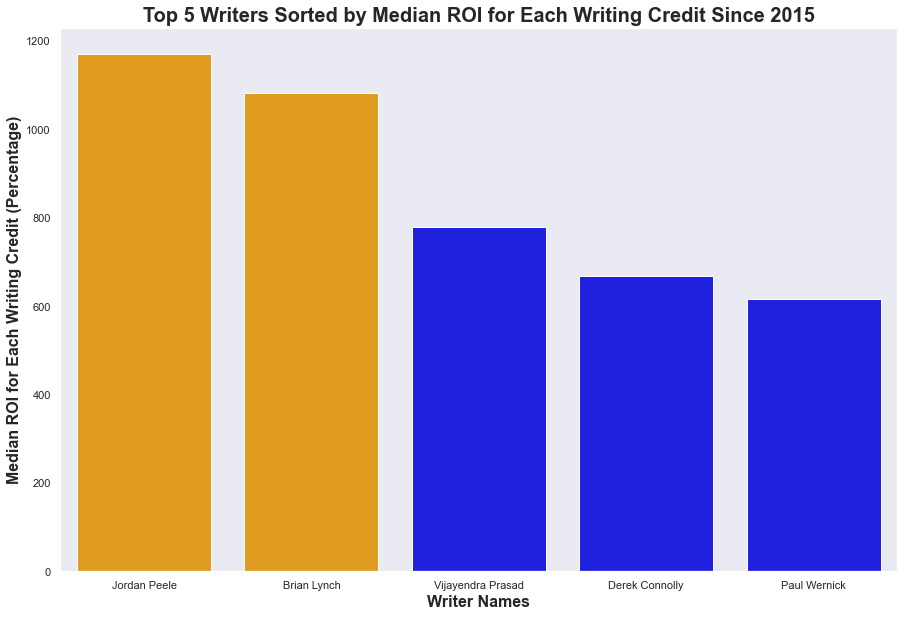

In [23]:
writer_list_median = df_writer_stats[df_writer_stats['count'] > 2].sort_values(by = '50%', ascending = False).head(5)
plt.figure(figsize = (15, 10))
clrs = ['orange', 'orange', 'blue', 'blue', 'blue']
ax = sns.barplot(x = writer_list_median.index, y = '50%', data=writer_list_median, palette=clrs)
sns.set_theme(style = 'darkgrid')
sns.set(font_scale = 1)
ax.grid(False)
ax.set_xlabel("Writer Names", size = 16, fontweight = 'bold')
ax.set_ylabel("Median ROI for Each Writing Credit (Percentage)", size = 16, fontweight = 'bold')
ax.set_title("Top 5 Writers Sorted by Median ROI for Each Writing Credit Since 2015", size = 20, fontweight = 'bold')
ax.figure.savefig("writers_median.png");

Visualizing top 5 writers list sorted by maximum ROI:

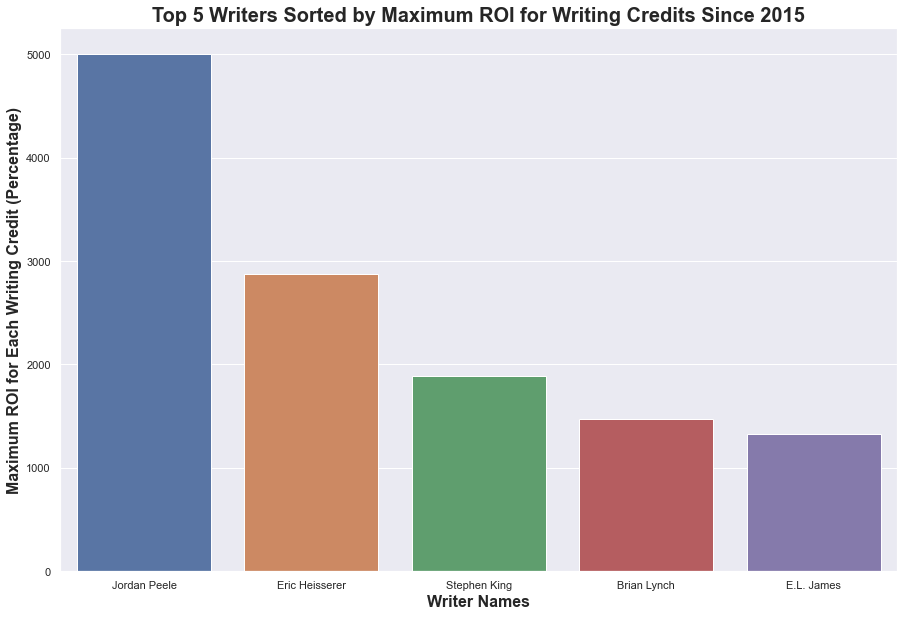

In [24]:
writer_list_max = df_writer_stats[df_writer_stats['count'] > 2].sort_values(by = 'max', ascending = False).head(5)
plt.figure(figsize = (15, 10))
ax = sns.barplot(x = writer_list_max.index, y = 'max', data=writer_list_max)
sns.set_theme(style = 'darkgrid')
ax.set_xlabel("Writer Names", size = 16, fontweight = 'bold')
ax.set_ylabel("Maximum ROI for Each Writing Credit (Percentage)", size = 16, fontweight = 'bold')
ax.set_title("Top 5 Writers Sorted by Maximum ROI for Writing Credits Since 2015", size = 20, fontweight = 'bold')
ax.figure.savefig("writers_max.png");

**No. 1 Selection:** Jordan Peele

In [25]:
jordan_peele = imdb_writers_name_roi[imdb_writers_name_roi['primary_name'] == 'Jordan Peele']
jordan_peele = jordan_peele[['primary_name', 'movie', 'year_int', 'roi']]
jordan_peele

,primary_name,movie,year_int,roi
2,Jordan Peele,Get Out,2017,5007.35902
63,Jordan Peele,Us,2019,1171.05155
1159,Jordan Peele,Keanu,2016,37.92094


**No. 2 Selection:** Eric Heisserer

In [26]:
eric_heisserer = imdb_writers_name_roi[imdb_writers_name_roi['primary_name'] == 'Eric Heisserer']
eric_heisserer = eric_heisserer[['primary_name', 'movie', 'roi']]
eric_heisserer

,primary_name,movie,roi
10,Eric Heisserer,Lights Out,2876.130200
421,Eric Heisserer,Arrival,332.187009
1647,Eric Heisserer,Bird Box,-100.000000


**No. 3 Selection:** Brian Lynch

In [27]:
brian_lynch = imdb_writers_name_roi[imdb_writers_name_roi['primary_name'] == 'Brian Lynch']
brian_lynch = brian_lynch[['primary_name', 'movie', 'year_int', 'roi']]
brian_lynch

,primary_name,movie,year_int,roi
47,Brian Lynch,Minions,2015,1468.021855
77,Brian Lynch,The Secret Life of Pets,2016,1082.334045
1143,Brian Lynch,The Secret Life of Pets 2,2019,41.689370


**No. 4 Selection:** E.L. James

In [28]:
el_james = imdb_writers_name_roi[imdb_writers_name_roi['primary_name'] == 'E.L. James']
el_james = el_james[['primary_name', 'movie', 'roi']]
el_james

,primary_name,movie,roi
53,E.L. James,Fifty Shades of Grey,1327.495252
209,E.L. James,Fifty Shades Darker,593.451804
232,E.L. James,Fifty Shades Freed,575.182944


**No. 5 Selection:** Stephen King

In [29]:
stephen_king = imdb_writers_name_roi[imdb_writers_name_roi['primary_name'] == 'Stephen King']
stephen_king = stephen_king[['primary_name', 'movie', 'roi']]
stephen_king

,primary_name,movie,roi
35,Stephen King,It,1892.737054
301,Stephen King,Pet Sematary,421.434029
990,Stephen King,The Dark Tower,89.102545


In [30]:
vijayendra_prasad = imdb_writers_name_roi[imdb_writers_name_roi['primary_name'] == 'Vijayendra Prasad']
vijayendra_prasad = vijayendra_prasad[['primary_name', 'movie', 'year_int', 'roi']]
vijayendra_prasad

,primary_name,movie,year_int,roi
106,Vijayendra Prasad,Bajrangi Bhaijaan,2015,836.756515
127,Vijayendra Prasad,Baahubali 2: The Conclusion,2017,778.343047
1377,Vijayendra Prasad,Baahubali: The Beginning,2015,-33.158338


In [31]:
derek_connolly = imdb_writers_name_roi[imdb_writers_name_roi['primary_name'] == 'Derek Connolly']
derek_connolly = derek_connolly[['primary_name', 'movie', 'year_int', 'roi']]
derek_connolly

,primary_name,movie,year_int,roi
159,Derek Connolly,Jurassic World: Fallen Kingdom,2018,668.101646
167,Derek Connolly,Jurassic World,2015,666.909239
686,Derek Connolly,Kong: Skull Island,2017,203.282194


In [32]:
paul_wernick = imdb_writers_name_roi[imdb_writers_name_roi['primary_name'] == 'Paul Wernick']
paul_wernick = paul_wernick[['primary_name', 'movie', 'year_int', 'roi']]
paul_wernick

,primary_name,movie,year_int,roi
58,Paul Wernick,Deadpool,2016,1281.078609
191,Paul Wernick,Deadpool 2,2018,615.164143
1061,Paul Wernick,Life,2017,74.016666


In [33]:
tn_imdb_merged_genre[tn_imdb_merged_genre['movie'] == 'Lights Out']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_int,ww_gross_int,pro_budget_int,roi,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,writers
4,55,"Jul 22, 2016",Lights Out,"$5,000,000","$67,268,835","$148,806,510",2016,148806510,5000000,28.761302,tt4786282,Lights Out,Lights Out,2016,81.0,Drama,6.3,100650.0,nm2497546,"nm2104063,nm2497546"
4,55,"Jul 22, 2016",Lights Out,"$5,000,000","$67,268,835","$148,806,510",2016,148806510,5000000,28.761302,tt4786282,Lights Out,Lights Out,2016,81.0,Horror,6.3,100650.0,nm2497546,"nm2104063,nm2497546"
4,55,"Jul 22, 2016",Lights Out,"$5,000,000","$67,268,835","$148,806,510",2016,148806510,5000000,28.761302,tt4786282,Lights Out,Lights Out,2016,81.0,Mystery,6.3,100650.0,nm2497546,"nm2104063,nm2497546"
5,55,"Jul 22, 2016",Lights Out,"$5,000,000","$67,268,835","$148,806,510",2016,148806510,5000000,28.761302,tt5328340,Lights Out,Lights Out,2016,90.0,Documentary,NaN,NaN,nm7839341,NaN


In [34]:
tn_imdb_merged_genre[tn_imdb_merged_genre['movie'] == 'Truth or Dare']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_int,ww_gross_int,pro_budget_int,roi,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,writers
7,91,"Apr 13, 2018",Truth or Dare,"$3,500,000","$41,411,015","$95,127,344",2018,95127344,3500000,26.179241,tt6772950,Truth or Dare,Truth or Dare,2018,100.0,Horror,5.2,33621.0,nm0905592,"nm0718555,nm3273842,nm1496753,nm0905592"
7,91,"Apr 13, 2018",Truth or Dare,"$3,500,000","$41,411,015","$95,127,344",2018,95127344,3500000,26.179241,tt6772950,Truth or Dare,Truth or Dare,2018,100.0,Thriller,5.2,33621.0,nm0905592,"nm0718555,nm3273842,nm1496753,nm0905592"
8,91,"Apr 13, 2018",Truth or Dare,"$3,500,000","$41,411,015","$95,127,344",2018,95127344,3500000,26.179241,tt6869948,Truth or Dare,Truth or Dare,2018,92.0,Comedy,NaN,NaN,"nm8969628,nm8408560",nm8986247
8,91,"Apr 13, 2018",Truth or Dare,"$3,500,000","$41,411,015","$95,127,344",2018,95127344,3500000,26.179241,tt6869948,Truth or Dare,Truth or Dare,2018,92.0,Drama,NaN,NaN,"nm8969628,nm8408560",nm8986247
8,91,"Apr 13, 2018",Truth or Dare,"$3,500,000","$41,411,015","$95,127,344",2018,95127344,3500000,26.179241,tt6869948,Truth or Dare,Truth or Dare,2018,92.0,Romance,NaN,NaN,"nm8969628,nm8408560",nm8986247


In [35]:
tn_imdb_merged_genre[tn_imdb_merged_genre['movie'] == '10 Cloverfield Lane']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_int,ww_gross_int,pro_budget_int,roi,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,writers
12,54,"Mar 11, 2016",10 Cloverfield Lane,"$5,000,000","$72,082,999","$108,286,422",2016,108286422,5000000,20.657284,tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,Drama,7.2,260383.0,nm0870469,"nm1061091,nm1173295,nm3227090"
12,54,"Mar 11, 2016",10 Cloverfield Lane,"$5,000,000","$72,082,999","$108,286,422",2016,108286422,5000000,20.657284,tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,Horror,7.2,260383.0,nm0870469,"nm1061091,nm1173295,nm3227090"
12,54,"Mar 11, 2016",10 Cloverfield Lane,"$5,000,000","$72,082,999","$108,286,422",2016,108286422,5000000,20.657284,tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,Mystery,7.2,260383.0,nm0870469,"nm1061091,nm1173295,nm3227090"


In [36]:
tn_imdb_merged_genre[tn_imdb_merged_genre['movie'] == 'The Gift']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_int,ww_gross_int,pro_budget_int,roi,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,writers
38,63,"Aug 7, 2015",The Gift,"$5,000,000","$43,787,265","$58,978,477",2015,58978477,5000000,10.795695,tt4178092,The Gift,The Gift,2015,108.0,Drama,7.1,123834.0,nm0249291,nm0249291
38,63,"Aug 7, 2015",The Gift,"$5,000,000","$43,787,265","$58,978,477",2015,58978477,5000000,10.795695,tt4178092,The Gift,The Gift,2015,108.0,Mystery,7.1,123834.0,nm0249291,nm0249291
38,63,"Aug 7, 2015",The Gift,"$5,000,000","$43,787,265","$58,978,477",2015,58978477,5000000,10.795695,tt4178092,The Gift,The Gift,2015,108.0,Thriller,7.1,123834.0,nm0249291,nm0249291


In [37]:
tn_imdb_merged_genre[tn_imdb_merged_genre['genres'] == 'Drama'].head(20)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_int,ww_gross_int,pro_budget_int,roi,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,writers
2,64,"Oct 21, 2016",Moonlight,"$1,500,000","$27,854,931","$65,245,512",2016,65245512,1500000,42.497008,tt4975722,Moonlight,Moonlight,2016,111.0,Drama,7.4,227964.0,nm1503575,"nm1503575,nm4144120"
3,56,"Dec 21, 2016",Dangal,"$9,500,000","$12,391,761","$294,654,618",2016,294654618,9500000,30.016276,tt5074352,Dangal,Dangal,2016,161.0,Drama,8.5,123638.0,nm4318159,"nm6328029,nm6328031,nm6328030,nm8661566,nm4318159"
4,55,"Jul 22, 2016",Lights Out,"$5,000,000","$67,268,835","$148,806,510",2016,148806510,5000000,28.761302,tt4786282,Lights Out,Lights Out,2016,81.0,Drama,6.3,100650.0,nm2497546,"nm2104063,nm2497546"
6,86,"Jul 7, 2017",A Ghost Story,"$100,000","$1,594,798","$2,769,782",2017,2769782,100000,26.697820,tt6265828,A Ghost Story,A Ghost Story,2017,92.0,Drama,6.8,46280.0,nm1108007,nm1108007
8,91,"Apr 13, 2018",Truth or Dare,"$3,500,000","$41,411,015","$95,127,344",2018,95127344,3500000,26.179241,tt6869948,Truth or Dare,Truth or Dare,2018,92.0,Drama,NaN,NaN,"nm8969628,nm8408560",nm8986247
11,66,"Aug 28, 2015",War Room,"$3,000,000","$67,790,117","$73,975,239",2015,73975239,3000000,23.658413,tt3832914,War Room,War Room,2015,120.0,Drama,6.5,11716.0,nm1731937,"nm1731937,nm1726854"
12,54,"Mar 11, 2016",10 Cloverfield Lane,"$5,000,000","$72,082,999","$108,286,422",2016,108286422,5000000,20.657284,tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,Drama,7.2,260383.0,nm0870469,"nm1061091,nm1173295,nm3227090"
13,92,"Dec 9, 2016",La La Land,"$20,000,000","$151,101,803","$426,351,163",2016,426351163,20000000,20.317558,tt3783958,La La Land,La La Land,2016,128.0,Drama,8.0,436070.0,nm3227090,nm3227090
17,66,"Apr 6, 2018",A Quiet Place,"$17,000,000","$188,024,361","$334,522,294",2018,334522294,17000000,18.677782,tt6644200,A Quiet Place,A Quiet Place,2018,90.0,Drama,7.6,305031.0,nm1024677,"nm1456816,nm1399714,nm1024677"
22,84,"Nov 2, 2018",Bohemian Rhapsody,"$55,000,000","$216,303,339","$894,985,342",2018,894985342,55000000,15.272461,tt1727824,Bohemian Rhapsody,Bohemian Rhapsody,2018,134.0,Drama,8.0,345466.0,nm0001741,"nm0565026,nm0604948"


In [38]:
tn_imdb_merged_genre[tn_imdb_merged_genre['movie'] == 'Lights Out']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_int,ww_gross_int,pro_budget_int,roi,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,writers
4,55,"Jul 22, 2016",Lights Out,"$5,000,000","$67,268,835","$148,806,510",2016,148806510,5000000,28.761302,tt4786282,Lights Out,Lights Out,2016,81.0,Drama,6.3,100650.0,nm2497546,"nm2104063,nm2497546"
4,55,"Jul 22, 2016",Lights Out,"$5,000,000","$67,268,835","$148,806,510",2016,148806510,5000000,28.761302,tt4786282,Lights Out,Lights Out,2016,81.0,Horror,6.3,100650.0,nm2497546,"nm2104063,nm2497546"
4,55,"Jul 22, 2016",Lights Out,"$5,000,000","$67,268,835","$148,806,510",2016,148806510,5000000,28.761302,tt4786282,Lights Out,Lights Out,2016,81.0,Mystery,6.3,100650.0,nm2497546,"nm2104063,nm2497546"
5,55,"Jul 22, 2016",Lights Out,"$5,000,000","$67,268,835","$148,806,510",2016,148806510,5000000,28.761302,tt5328340,Lights Out,Lights Out,2016,90.0,Documentary,NaN,NaN,nm7839341,NaN


In [39]:
tn_imdb_merged_genre[tn_imdb_merged_genre['movie'] == 'Lights Out']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_int,ww_gross_int,pro_budget_int,roi,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,writers
4,55,"Jul 22, 2016",Lights Out,"$5,000,000","$67,268,835","$148,806,510",2016,148806510,5000000,28.761302,tt4786282,Lights Out,Lights Out,2016,81.0,Drama,6.3,100650.0,nm2497546,"nm2104063,nm2497546"
4,55,"Jul 22, 2016",Lights Out,"$5,000,000","$67,268,835","$148,806,510",2016,148806510,5000000,28.761302,tt4786282,Lights Out,Lights Out,2016,81.0,Horror,6.3,100650.0,nm2497546,"nm2104063,nm2497546"
4,55,"Jul 22, 2016",Lights Out,"$5,000,000","$67,268,835","$148,806,510",2016,148806510,5000000,28.761302,tt4786282,Lights Out,Lights Out,2016,81.0,Mystery,6.3,100650.0,nm2497546,"nm2104063,nm2497546"
5,55,"Jul 22, 2016",Lights Out,"$5,000,000","$67,268,835","$148,806,510",2016,148806510,5000000,28.761302,tt5328340,Lights Out,Lights Out,2016,90.0,Documentary,NaN,NaN,nm7839341,NaN


In [40]:
tn_imdb_merged_genre[tn_imdb_merged_genre['movie'] == 'Truth or Dare']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_int,ww_gross_int,pro_budget_int,roi,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,writers
7,91,"Apr 13, 2018",Truth or Dare,"$3,500,000","$41,411,015","$95,127,344",2018,95127344,3500000,26.179241,tt6772950,Truth or Dare,Truth or Dare,2018,100.0,Horror,5.2,33621.0,nm0905592,"nm0718555,nm3273842,nm1496753,nm0905592"
7,91,"Apr 13, 2018",Truth or Dare,"$3,500,000","$41,411,015","$95,127,344",2018,95127344,3500000,26.179241,tt6772950,Truth or Dare,Truth or Dare,2018,100.0,Thriller,5.2,33621.0,nm0905592,"nm0718555,nm3273842,nm1496753,nm0905592"
8,91,"Apr 13, 2018",Truth or Dare,"$3,500,000","$41,411,015","$95,127,344",2018,95127344,3500000,26.179241,tt6869948,Truth or Dare,Truth or Dare,2018,92.0,Comedy,NaN,NaN,"nm8969628,nm8408560",nm8986247
8,91,"Apr 13, 2018",Truth or Dare,"$3,500,000","$41,411,015","$95,127,344",2018,95127344,3500000,26.179241,tt6869948,Truth or Dare,Truth or Dare,2018,92.0,Drama,NaN,NaN,"nm8969628,nm8408560",nm8986247
8,91,"Apr 13, 2018",Truth or Dare,"$3,500,000","$41,411,015","$95,127,344",2018,95127344,3500000,26.179241,tt6869948,Truth or Dare,Truth or Dare,2018,92.0,Romance,NaN,NaN,"nm8969628,nm8408560",nm8986247


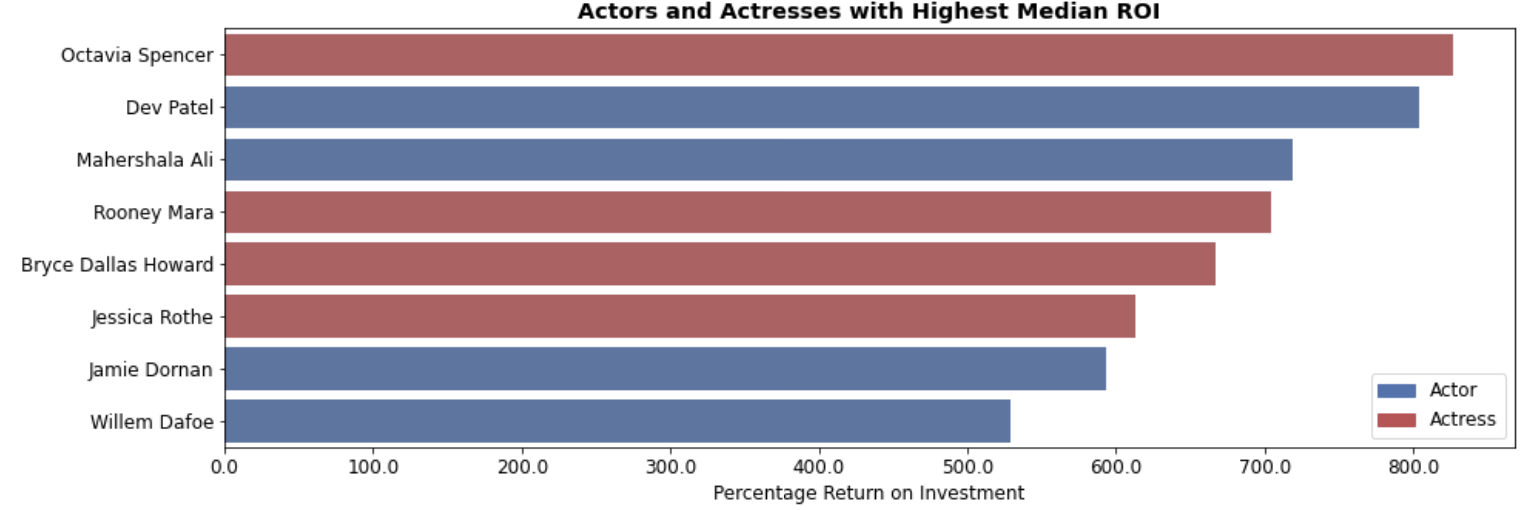